In [345]:
import numpy as np
import pandas as pd

In [346]:
ds = pd.read_csv('cars-dataset.csv')

In [347]:
ds.columns

Index([u'car name', u'cyl', u'disp', u'hp', u'wt', u'acc', u'yr', u'mpg'], dtype='object')

In [348]:
ds.shape

(398, 8)

In [349]:
ds.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [350]:
ds.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6


In [351]:
ds.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [352]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['car name'] = le.fit_transform(ds['car name'])

In [353]:
(ds['hp'] == '?').sum()

6

In [354]:
from scipy.stats import mode
(ds['hp']).mode()

0    150
dtype: object

In [355]:
ds.replace(['?'], ds['hp'].mode(),inplace = True)

In [356]:
(ds['hp'] == '?').sum()                                     

0

In [357]:
ds['hp'] = ds['hp'].astype(int)

In [358]:
ds.dtypes

car name      int64
cyl           int64
disp        float64
hp            int32
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [359]:
ds.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
car name,398.0,148.550251,89.495880,0.0,65.250,150.0,225.750,304.0
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,105.155779,38.600986,46.0,76.000,95.0,130.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [360]:
def remove_outlier(dFrame, col_name):
    q1 = dFrame[col_name].quantile(0.25)
    q3 = dFrame[col_name].quantile(0.75)
    IQR = q3-q1 #Interquartile range
    lowVal  = q1 - 1.5*IQR
    highVal = q3 + 1.5*IQR
    frame_ret = dFrame.loc[(dFrame[col_name] > lowVal) & (dFrame[col_name] < highVal)]
    return frame_ret

In [361]:
for col in ds.columns:
    if(col != 'car name'):
        ds = remove_outlier(ds, col)

In [362]:
ds.shape

(381, 8)

C:\Users\GL\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


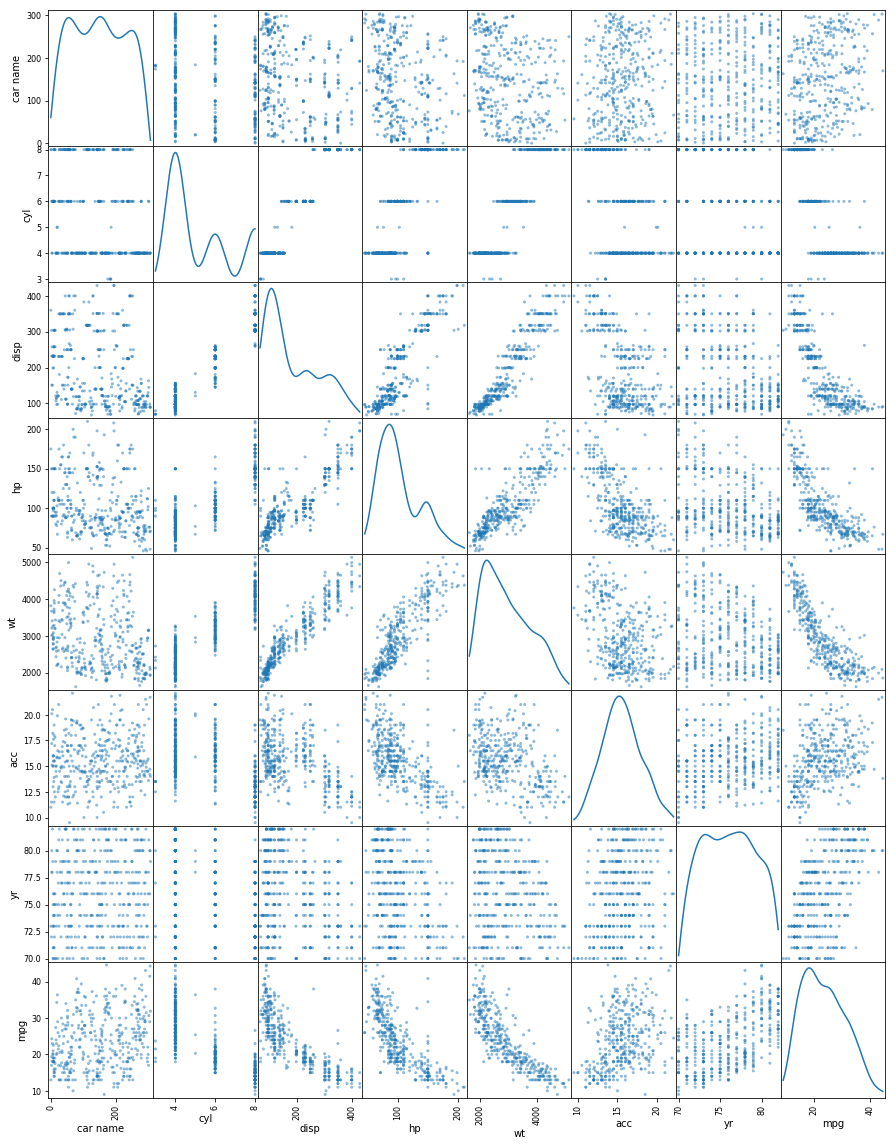

In [363]:
a = pd.scatter_matrix(ds,diagonal ='kde', figsize = (15,20))

In [364]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [365]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(ds)
    kmeanModel.fit(ds)
    distortions.append(
        sum(np.min(cdist(ds, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / ds.shape[0])

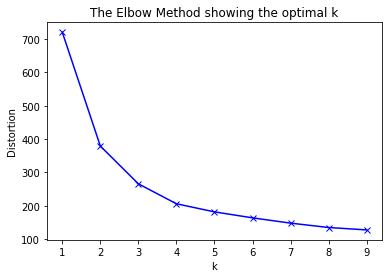

In [366]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [367]:
kmeans = KMeans(n_clusters=3)

In [368]:
kmeans.fit(ds)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [369]:
kmeans.labels_

array([0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0,
       2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [370]:
ds['label'] = kmeans.labels_

In [371]:
ds.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,label
0,49,8,307.0,130,3504,12.0,70,18.0,0
1,36,8,350.0,165,3693,11.5,70,15.0,2
2,231,8,318.0,150,3436,11.0,70,18.0,0
3,14,8,304.0,150,3433,12.0,70,16.0,0
4,161,8,302.0,140,3449,10.5,70,17.0,0


In [372]:
ds1 = ds[ds.loc[:,'label'] == 0]

In [373]:
from sklearn.linear_model import LinearRegression

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
ds1_y = ds1.pop('mpg')
ds1.pop('label')
ds1.pop('car name')

0       49
2      231
3       14
4      161
10     101
15     220
16       8
34     232
35      49
36     162
37      10
45       9
47     243
48     151
76     295
78     212
97     235
98      62
99       8
100    150
101    220
107      7
120    294
121    113
123    276
125    220
126    150
127      8
128     61
134     10
      ... 
297    184
305     37
307    205
313     52
314    134
315      3
316     98
318    273
323    103
327     20
328    185
333     81
336    152
341     52
359    213
360    299
361    275
362     90
363     24
365    146
366     72
372    248
373    138
374      5
386     26
387    199
389    147
392     43
393    153
397     69
Name: car name, Length: 122, dtype: int64

In [376]:
ds1_y = ds1_y.reshape(len(ds1_y),1)

C:\Users\GL\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [377]:
ds1.shape

(122, 6)

In [378]:
ds1_x = ds1

In [379]:
ds1_x.shape

(122, 6)

In [380]:
ds1_xtrain, ds1_xtest, ds1_ytrain, ds1_ytest = train_test_split(ds1_x,ds1_y,test_size = 0.3)

In [381]:
ds1_ytest.shape

(37L, 1L)

In [382]:
Lreg = LinearRegression()

In [383]:
Lreg.fit(ds1_xtrain,ds1_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [384]:
ds1_ypred = Lreg.predict(ds1_xtest)

In [385]:
ds1_ytest.shape

(37L, 1L)

In [386]:
Lreg.score(ds1_xtest, ds1_ytest)

0.5919091533892936

In [387]:
ds1_ytest.shape

(37L, 1L)

In [388]:
Lreg.score(ds1_xtrain, ds1_ytrain)

0.5428916372209427

In [389]:
ds2 = ds[ds.loc[:,'label'] == 1]

In [390]:
ds2_y = ds2.pop('mpg')
ds2.pop('label')
ds2.pop('car name')

14     274
17     150
18      95
19     282
20     211
21      16
22     258
23      22
24       7
29      95
30      65
31     271
32     156
33       7
46      64
49     187
50     208
51     210
52     123
53     267
54      76
55     286
56     218
57     272
58     105
60      63
61     158
71     183
77     283
79     253
      ... 
350    226
351    131
352    130
353    285
354    255
355    172
356    266
357     78
358    175
367     45
368     47
369     46
370    246
371     96
375    290
376    179
377    178
378    227
379    191
380    198
381    164
382    266
383    167
384    168
385     83
388     71
390    264
391    102
395    119
396    159
Name: car name, Length: 174, dtype: int64

In [391]:
ds2_y = ds2_y.reshape(len(ds2_y),1)

C:\Users\GL\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [392]:
ds2_x = ds2

In [393]:
ds2_xtrain, ds2_xtest, ds2_ytrain, ds2_ytest = train_test_split(ds2_x,ds2_y,test_size = 0.3)

In [394]:
Lreg2 = LinearRegression()

In [395]:
Lreg2.fit(ds2_xtrain,ds2_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [396]:
Lreg2.score(ds2_xtest, ds2_ytest)

0.5977638777230896

In [397]:
Lreg2.score(ds2_xtrain, ds2_ytrain)

0.7238990381238535

In [398]:
a1 = Lreg2.coef_

In [399]:
x2 = pd.DataFrame(a1, columns=ds2.columns)

In [400]:
x2

,cyl,disp,hp,wt,acc,yr
0,1.976231,-0.042023,0.01121,-0.010234,0.041641,0.899472


In [402]:
ds3 = ds[ds.loc[:,'label'] == 2]

In [405]:
ds3_y = ds3.pop('mpg')
ds3.pop('label')
ds3.pop('car name')

1       36
5      141
12      57
26      68
27     112
28     163
38      54
39     242
40     141
41     223
42     116
43     129
44     250
62      54
63     241
64     223
65     141
66       2
67     192
68      31
69     203
70      75
72      11
73      48
74     143
75     233
85      25
86      10
87      55
88     142
      ... 
163    221
187     50
188    108
189     10
190    142
208    239
211    186
212     39
213     67
214    132
215    111
221     44
222    202
223    117
224    189
229    245
230     58
231     70
232    160
250    114
265    115
285     44
286    149
287    190
288    120
289     30
290    129
292     73
298     38
364    200
Name: car name, Length: 85, dtype: int64

In [406]:
ds3_y = ds3_y.reshape(len(ds3_y),1)

C:\Users\GL\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [409]:
ds3_x = ds3

In [410]:
ds3_xtrain, ds3_xtest, ds3_ytrain, ds3_ytest = train_test_split(ds3_x,ds3_y,test_size = 0.3)

In [413]:
Lreg3 = LinearRegression()

In [414]:
Lreg3.fit(ds3_xtrain,ds3_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [416]:
a3 = Lreg3.coef_

In [417]:
x3 = pd.DataFrame(a3, columns=ds3.columns)

In [418]:
x3

,cyl,disp,hp,wt,acc,yr
0,0.129774,0.014449,-0.026559,-0.003267,0.139691,0.480834


In [420]:
Lreg3.score(ds3_xtest, ds3_ytest)

0.3059559261436978